NAME: IMAAD IMRAN HAJWANE  
FINAL YEAR 2025  
VISHWAKARMA UNIVERISTY  
LINKEDIN: Imaad Hajwane  
EMAIL: iamimaad2kk3@gmail.com


## Step 1: Opportunity Evaluation


Choosing a Project Topic:
*Customer Churn Prediction for a Subscription-Based Service*

- Context: Companies that offer subscription-based services (like Netflix, Spotify, etc.) often struggle with customer churn, where customers stop using their services. Predicting which customers are likely to churn can help the company take proactive steps to retain them.

- Why ML?:

1. Data Availability: Subscription services typically collect large amounts of customer data, such as usage patterns, payment history, and customer support interactions.  
2. Feasibility: Predictive models can be trained to identify patterns in this data that are indicative of future churn.  
3. Business Impact: Reducing churn can significantly improve profitability since acquiring new customers is often more expensive than retaining existing ones.

- Dataset Selection
For this project, we'll need a dataset with customer information, including features like usage statistics, account information, and whether the customer has churned. A well-known dataset for this type of project is the Telco Customer Churn dataset from Kaggle. 

## Step 2: CRISP-DM Business Understanding


- Defining the Problem
1. Using the CRISP-DM (Cross-Industry Standard Process for Data Mining) framework:  
2. Business Objective: Reduce customer churn by predicting which customers are likely to cancel their subscription in the next period.   
3. Data Mining Objective: Develop a predictive model that accurately identifies customers who are likely to churn based on their historical data.    

- Success Criteria:  
1. Outcome Metrics: Reduction in churn rate by a specific percentage (e.g., 5% reduction).  
2. Output Metrics: Accuracy, precision, recall, F1-score of the churn prediction model.  
3. Identifying Relevant Factors  
4. Potentially relevant factors might include:

- Features
1. Customer Demographics: Age, gender, income level.
2. Service Usage: Number of services used, frequency of use.
3. Account Information: Contract type, tenure, payment method.
4. Support Interaction: Number of support tickets, type of issues raised

## Step 3: Solution Validation Plan


- Solution Concept
The solution will be a binary classification model that predicts whether a customer will churn (yes/no) based on the provided features. The model will be a combination of various machine learning algorithms at the end the summary will provide the best suitable solution for this problem

- Validation Strategy
1. Data Splitting: Split the dataset into training, validation, and test sets.  
2. Iterative Experimentation:  
    Initial Model: Train a basic model (e.g., logistic regression) and evaluate its performance on the validation set.  
    Feature Engineering: Add or remove features, and transform data (e.g., scaling, encoding categorical variables).  
    Model Tuning: Optimize hyperparameters using cross-validation.  
    Model Comparison: Compare different models (e.g., logistic regression, Random Forest, Gradient Boosting) and select the best one.  

## Step 4: ML System Design


Key System-Level Architecture Decisions

- Data Pipeline:

1. Ingestion: Collect real-time customer data.
2. Processing: Clean and preprocess the data (e.g., handle missing values, standardize inputs).
3. Feature Engineering: Generate additional features (e.g., time since last interaction). [Important]

- Model Deployment:

1. Batch Processing: Predict churn probability on a scheduled basis (e.g., weekly).
2. Real-Time Scoring: Predict churn probability in real-time as new data comes in.
3. Monitoring:

- Performance Monitoring: Track the model's accuracy, precision, recall, etc., over time.  
- Data Drift Detection: Monitor changes in input data distributions that could affect model performance. [final evaluation of the model]

## Step 5: Potential Risks in Production


- Identifying Risks

1. Data Drift: If customer behavior changes over time, the model may become less accurate. Regular retraining of the model will be necessary.

2. Concept Drift: If the factors that influence churn change over time, the model might need to be updated to reflect new patterns.

3. Training-Serving Skew: Differences between the training data and the live data used during deployment could lead to performance degradation. Ensure that the same preprocessing steps are applied in both training and production environments.

4. Latency: If the model is deployed in a real-time system, ensure that predictions can be made quickly enough to be actionable.

----------

### Machine Learning Codes

##### Import Libraries

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


##### Read Dataset with EDA

In [4]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(),df.info(),df.describe(),df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


(   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
 0  7590-VHVEG  Female              0     Yes         No       1           No   
 1  5575-GNVDE    Male              0      No         No      34          Yes   
 2  3668-QPYBK    Male              0      No         No       2          Yes   
 3  7795-CFOCW    Male              0      No         No      45           No   
 4  9237-HQITU  Female              0      No         No       2          Yes   
 
       MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
 0  No phone service             DSL             No  ...               No   
 1                No             DSL            Yes  ...              Yes   
 2                No             DSL            Yes  ...               No   
 3  No phone service             DSL            Yes  ...              Yes   
 4                No     Fiber optic             No  ...               No   
 
   TechSupport StreamingTV StreamingMovies      

##### Spliting Column for Feature Extraction

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


##### Univariate Analysis

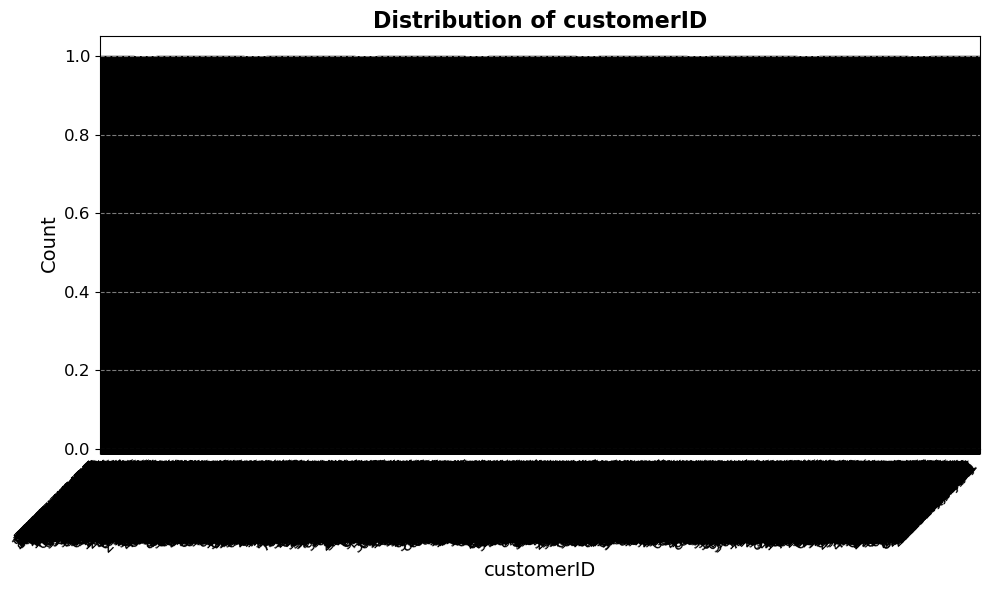

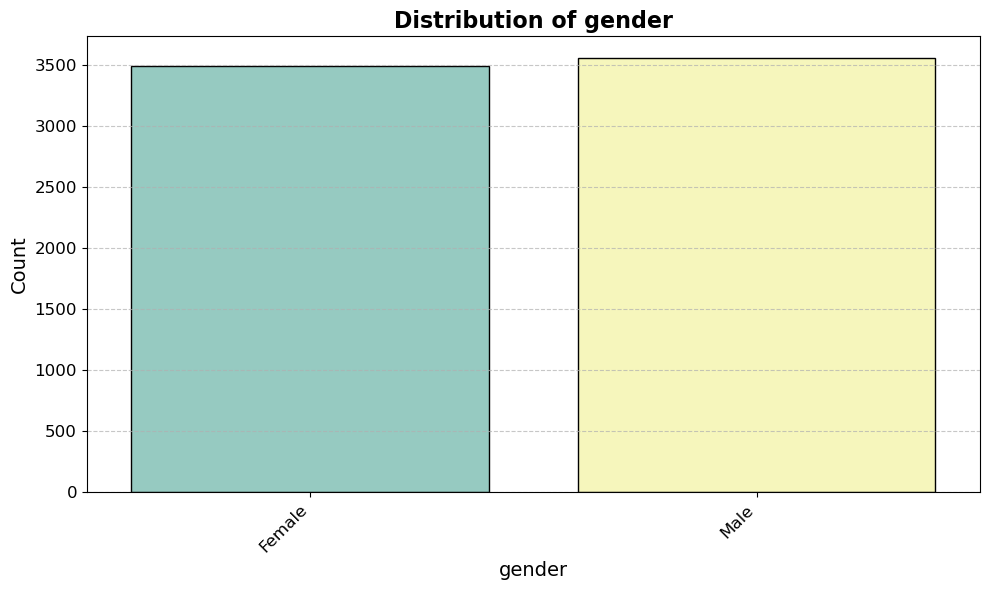

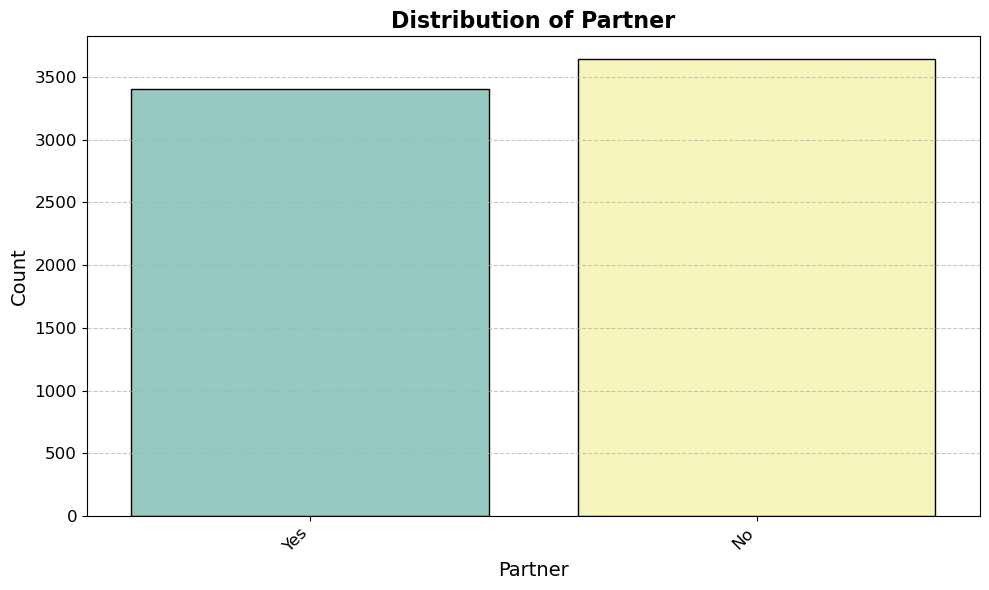

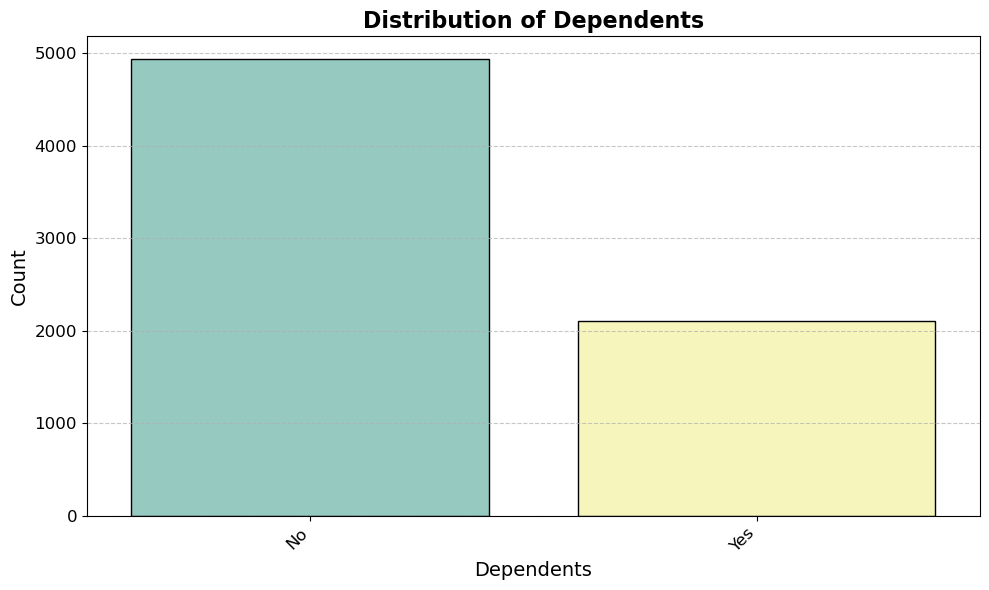

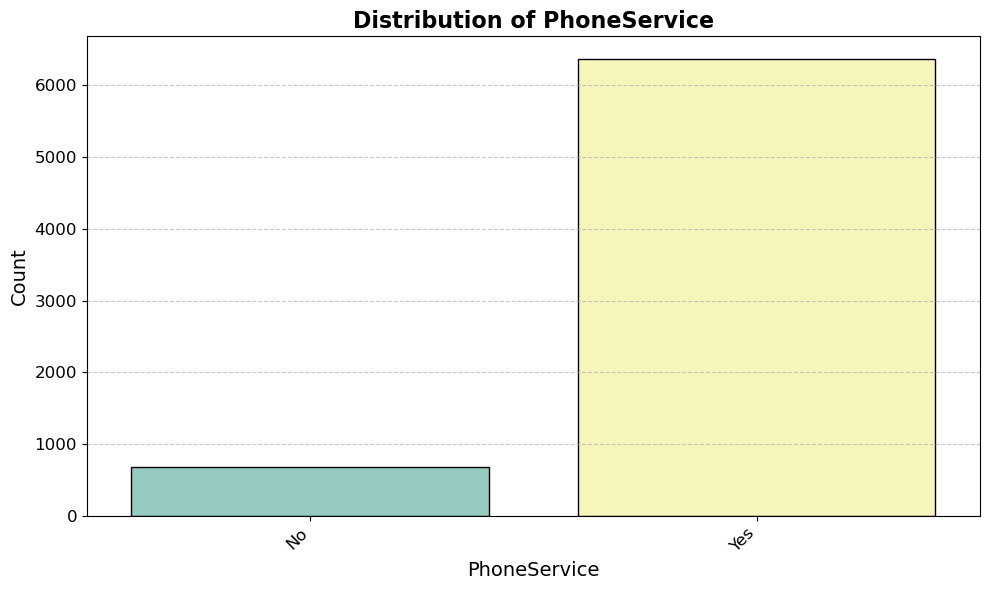

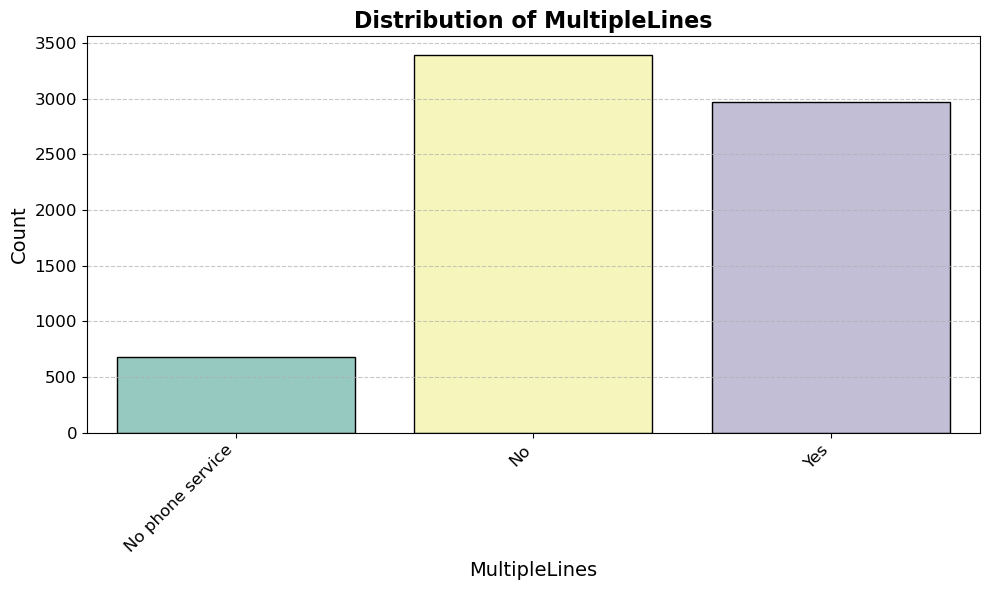

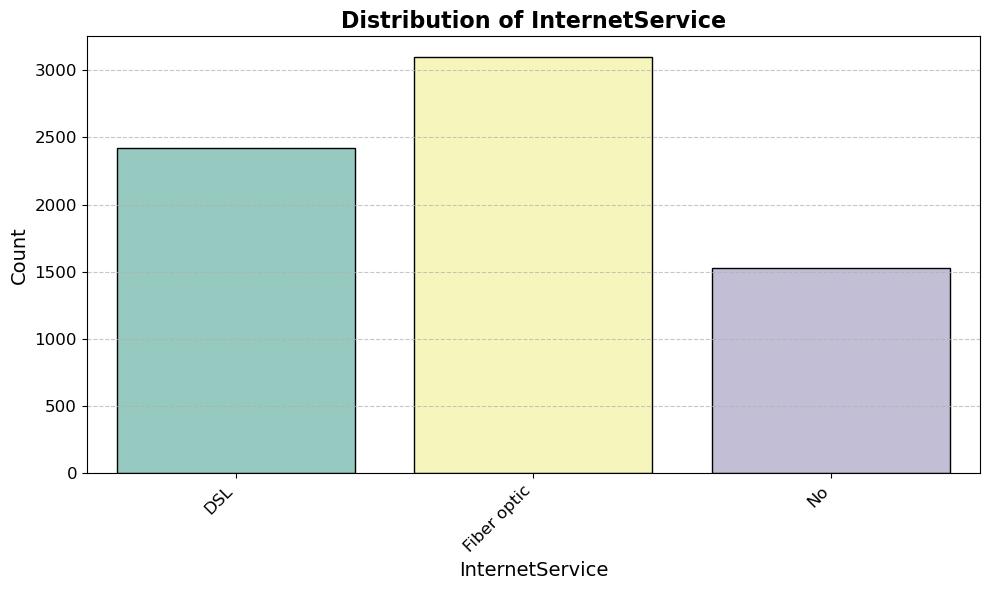

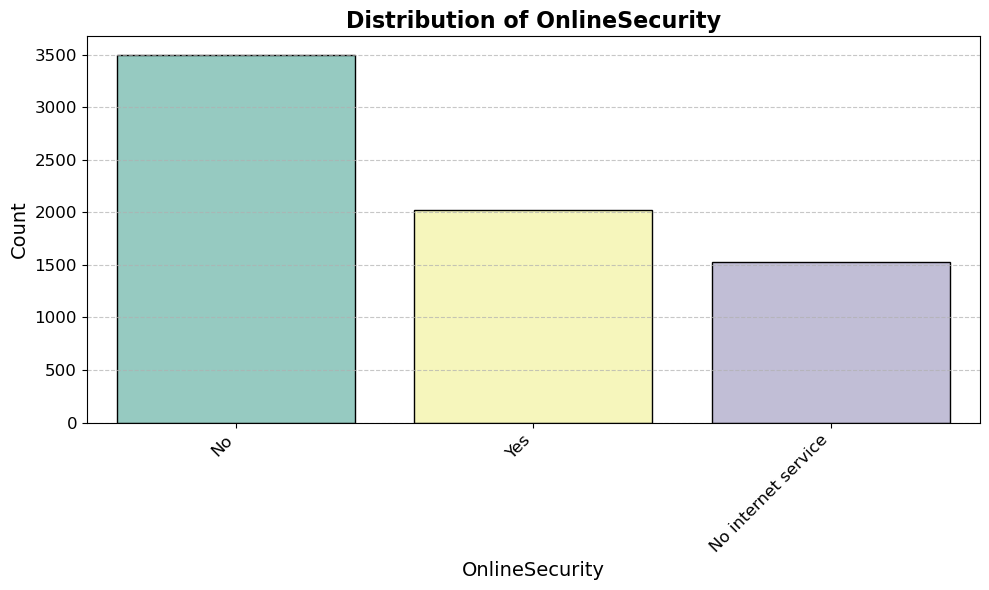

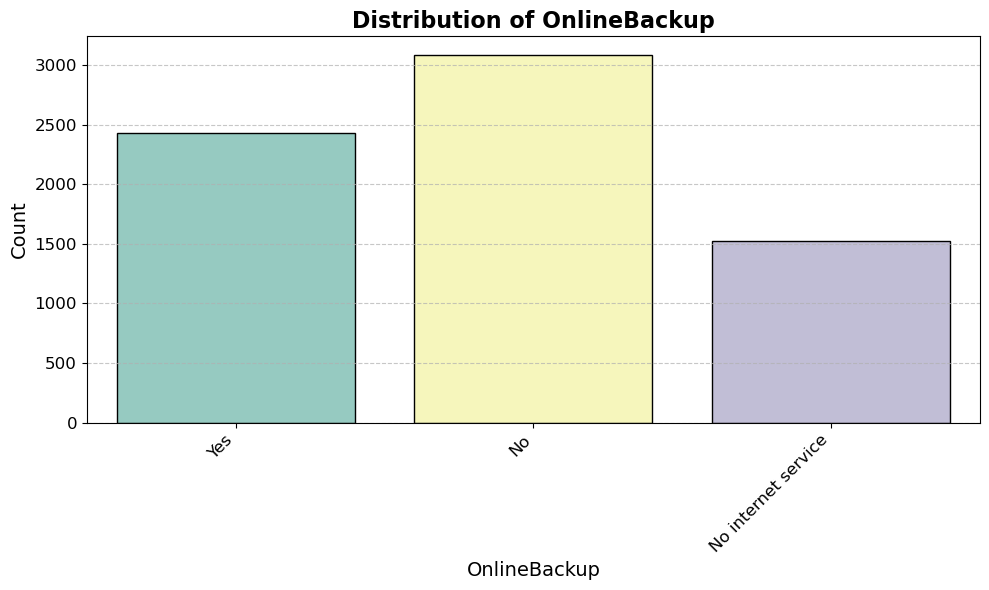

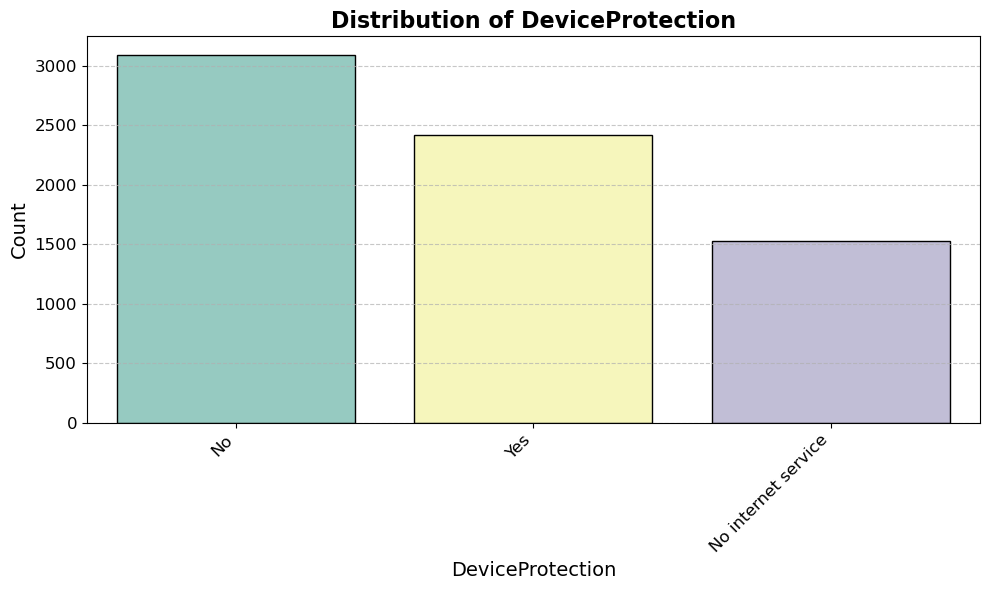

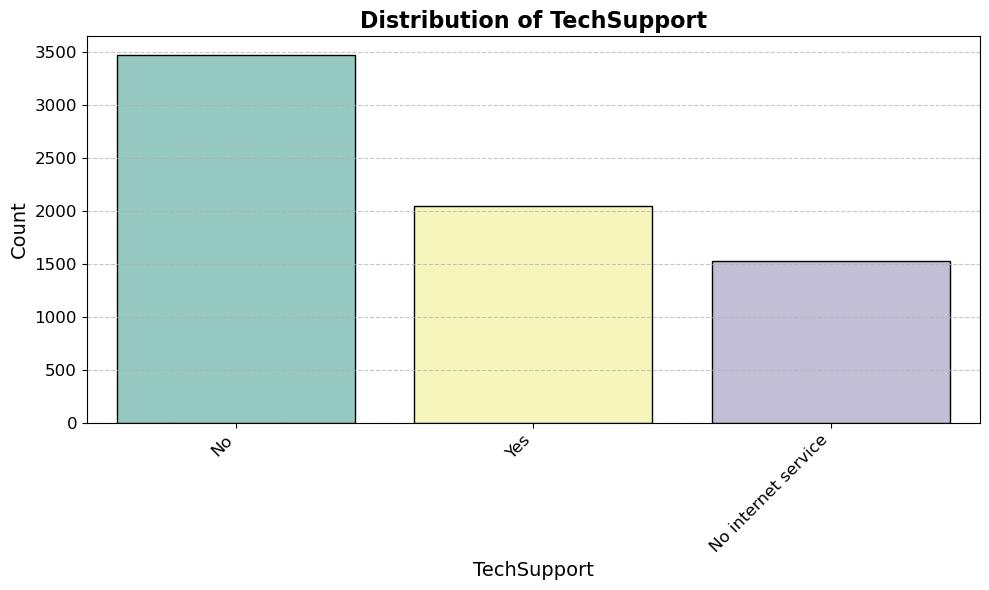

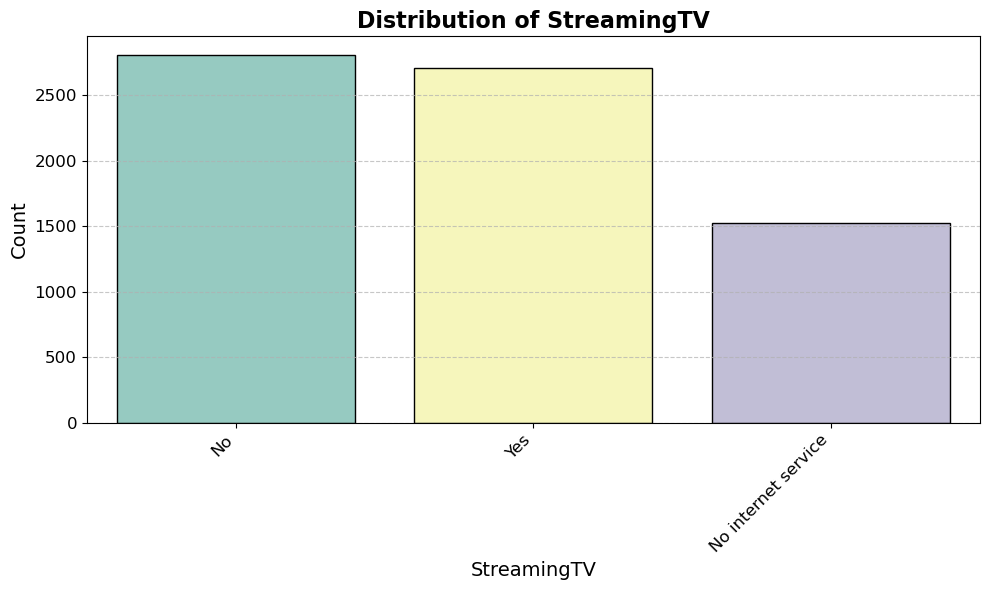

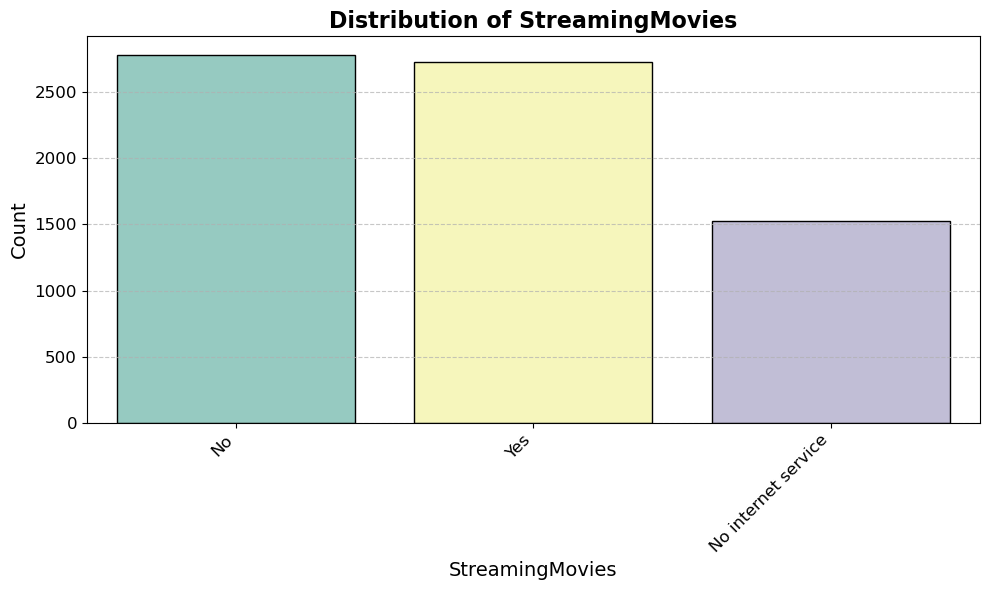

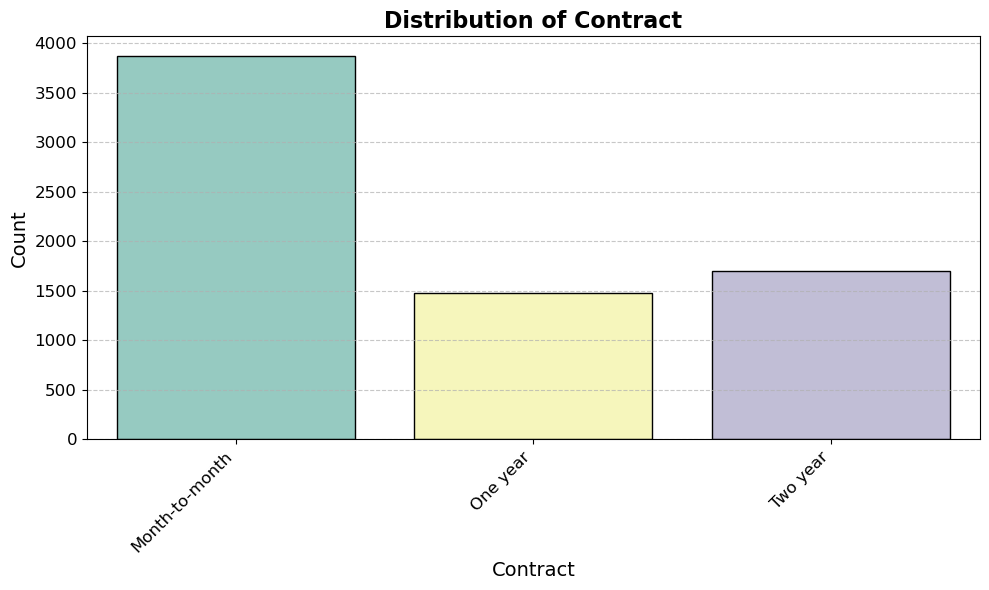

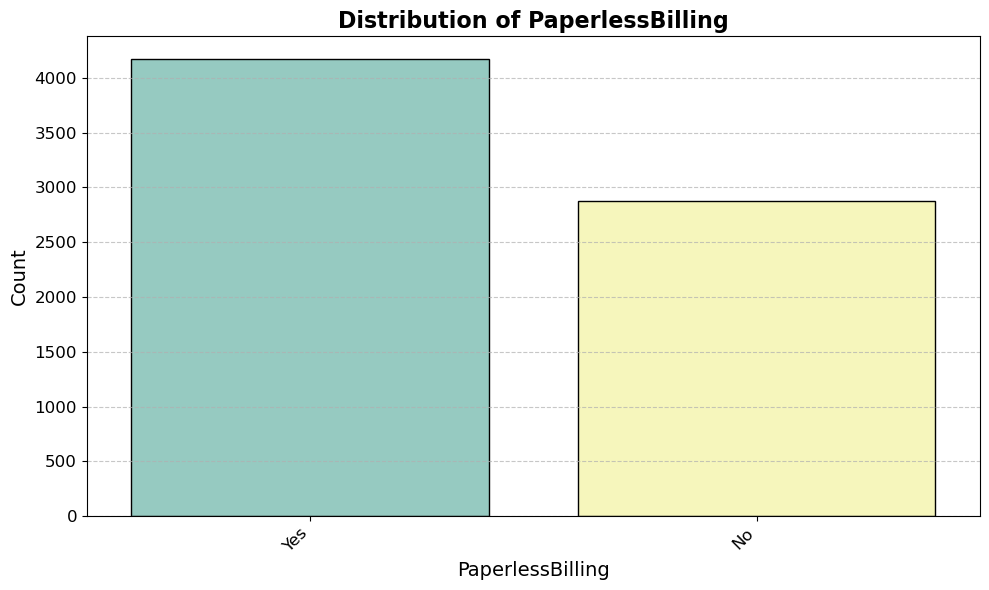

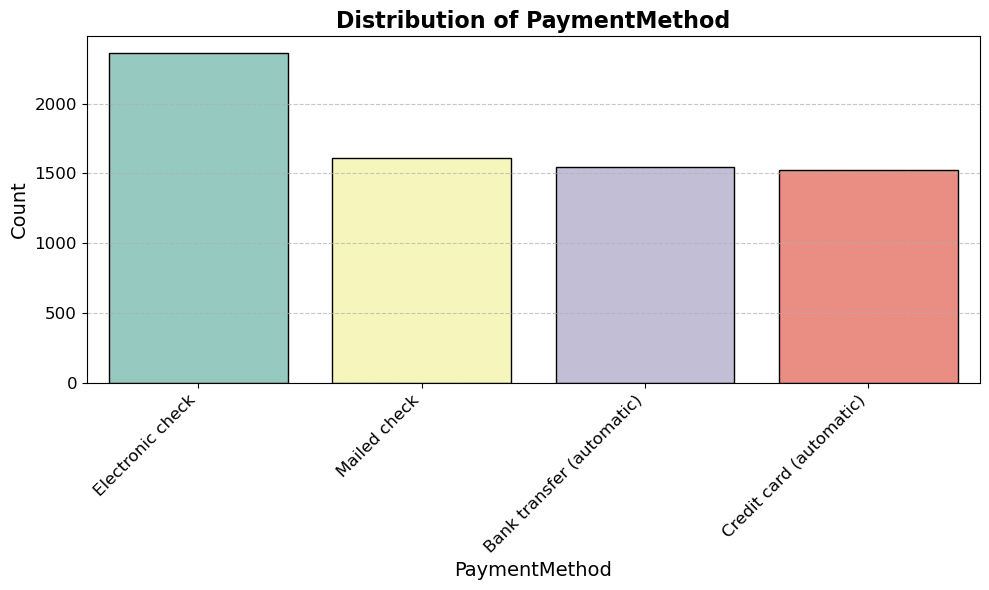

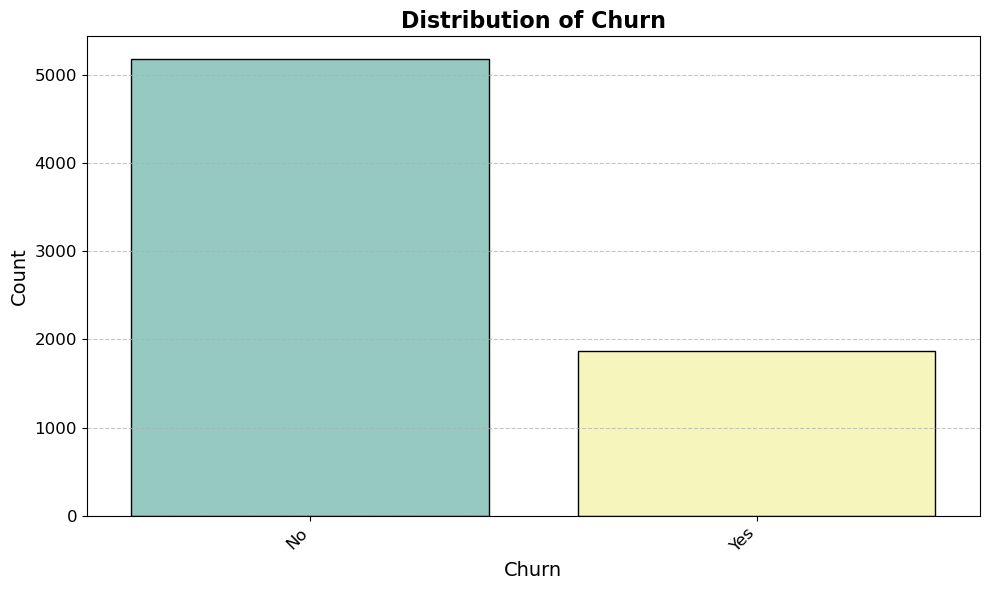

In [6]:
# Categorical features distribution
categorical_features = df.select_dtypes(include=['object']).columns

for col in categorical_features:
    plt.figure(figsize=(10, 6))  # Increased figure size for better readability
    sns.countplot(data=df, x=col, palette='Set3', edgecolor='black')  # Added edgecolor for clarity
    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold')  # Enhanced title font size and weight
    plt.xlabel(f'{col}', fontsize=14)  # Added xlabel with appropriate fontsize
    plt.ylabel('Count', fontsize=14)  # Added ylabel with appropriate fontsize
    plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotated x-axis labels for better fit
    plt.yticks(fontsize=12)  # Adjusted y-axis ticks fontsize
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Added a grid for better readability
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


##### Numerical Features Distribution

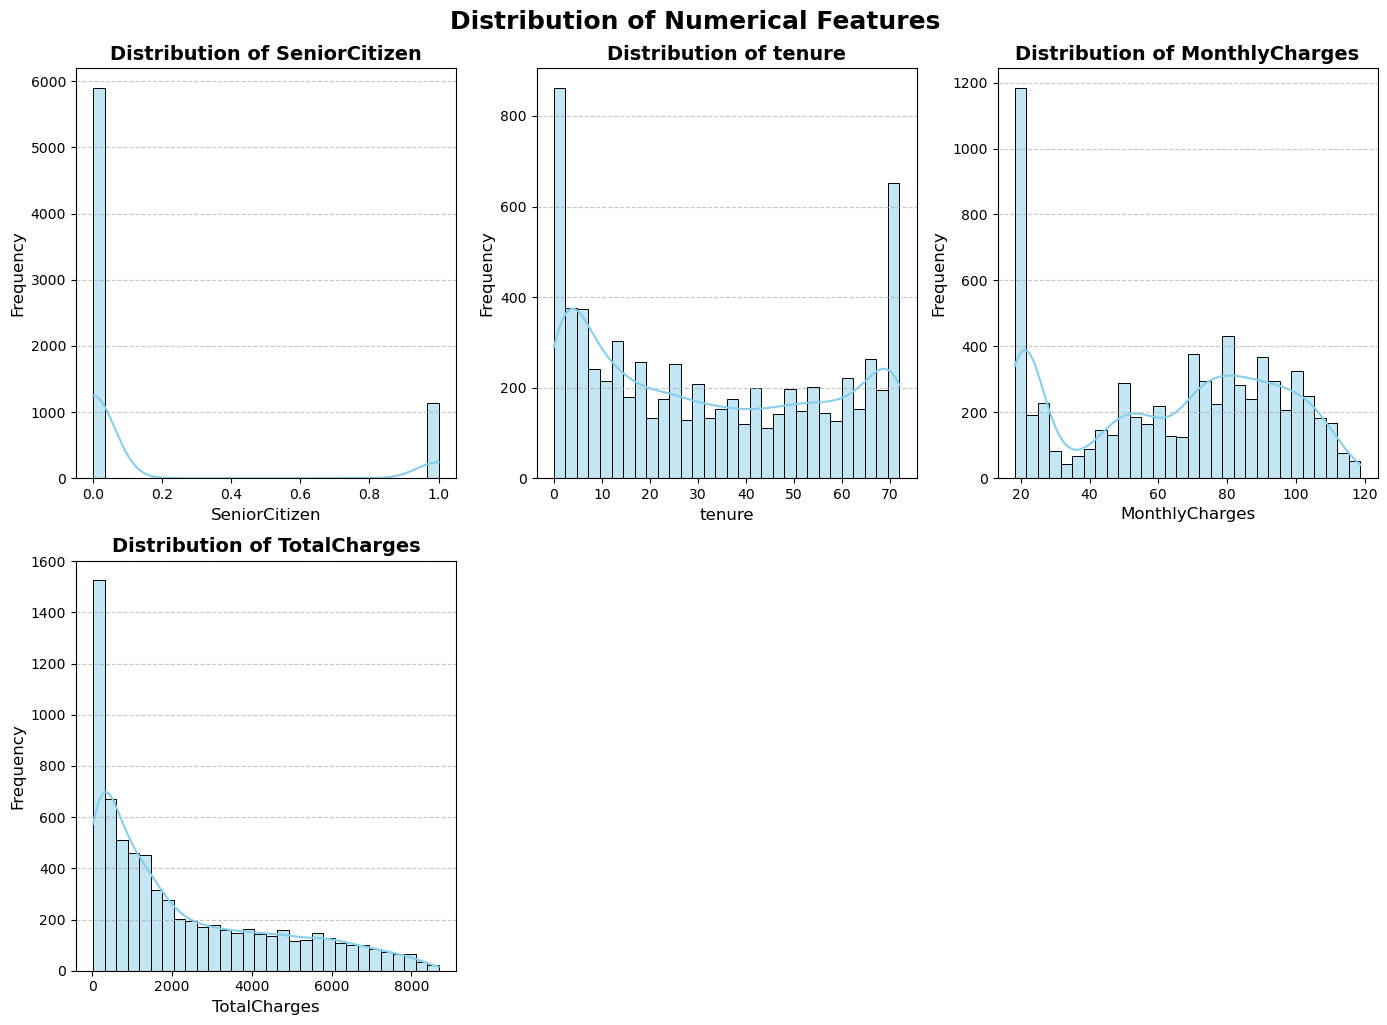

In [7]:
# Numerical features distribution
numerical_features = df.select_dtypes(include=[np.number]).columns

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))
n = len(numerical_features)
ncols = 3  # Number of columns for subplots
nrows = (n // ncols) + (n % ncols > 0)  # Number of rows for subplots

# Create subplots
for i, col in enumerate(numerical_features):
    plt.subplot(nrows, ncols, i + 1)
    sns.histplot(df[col], bins=30, color='skyblue', edgecolor='black', kde=True)  # Added KDE
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.suptitle("Distribution of Numerical Features", fontsize=18, fontweight='bold', y=1.02)
plt.show()


##### Bivariate Analysis: Churn vs Categorical Features

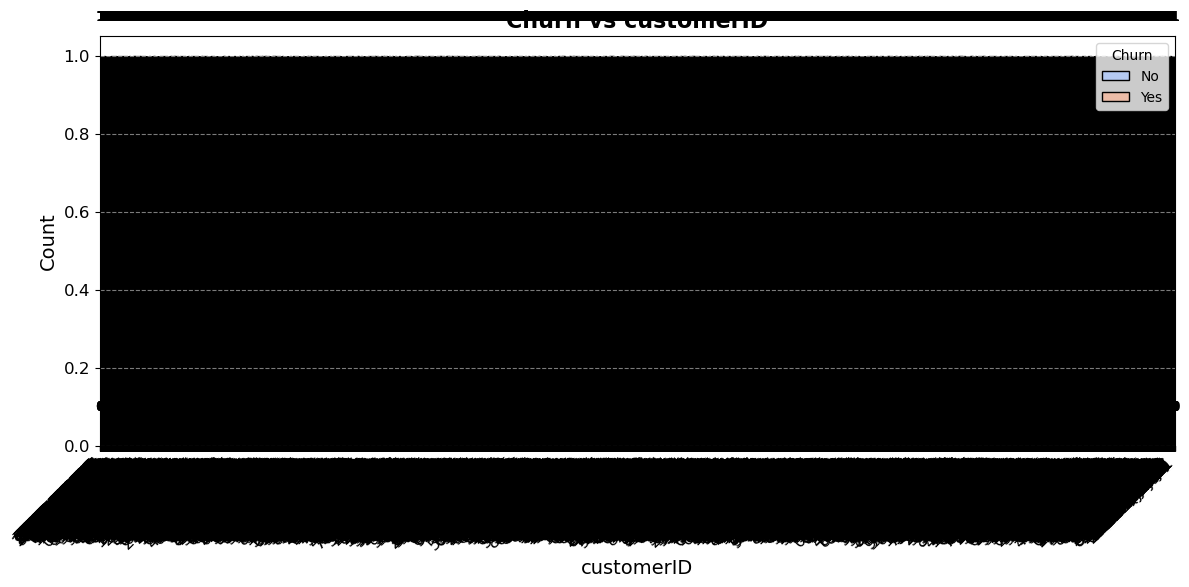

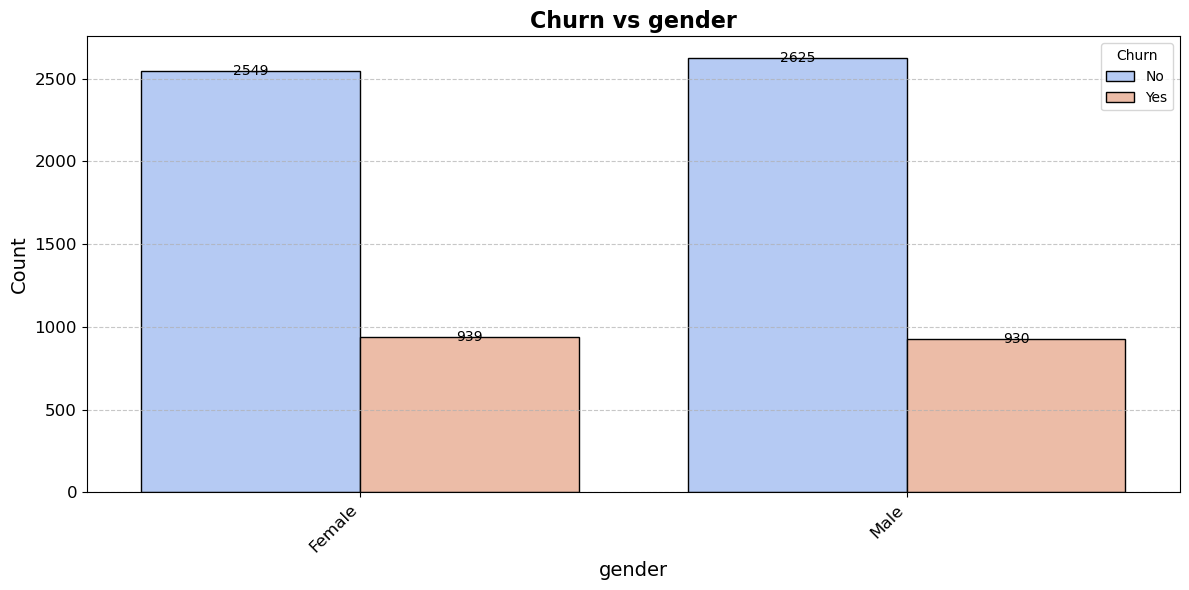

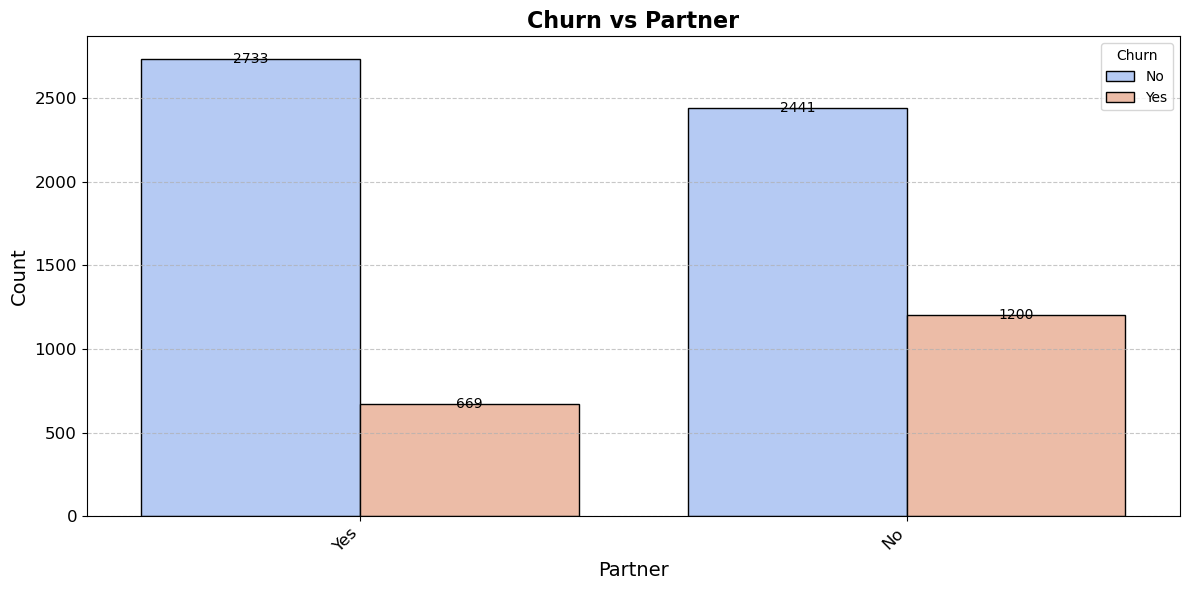

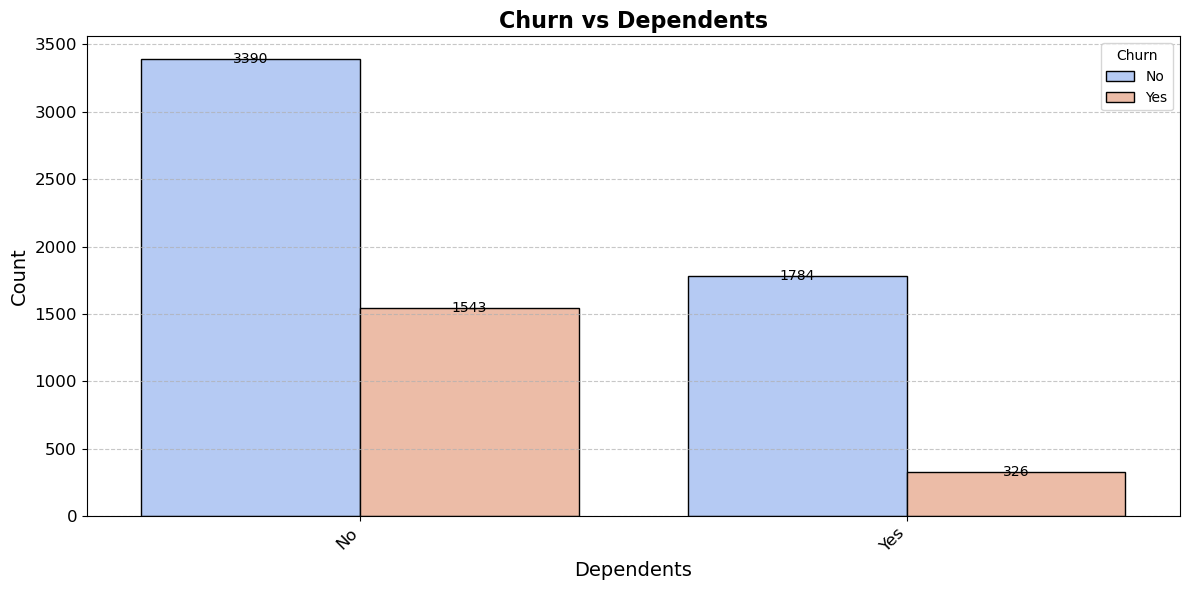

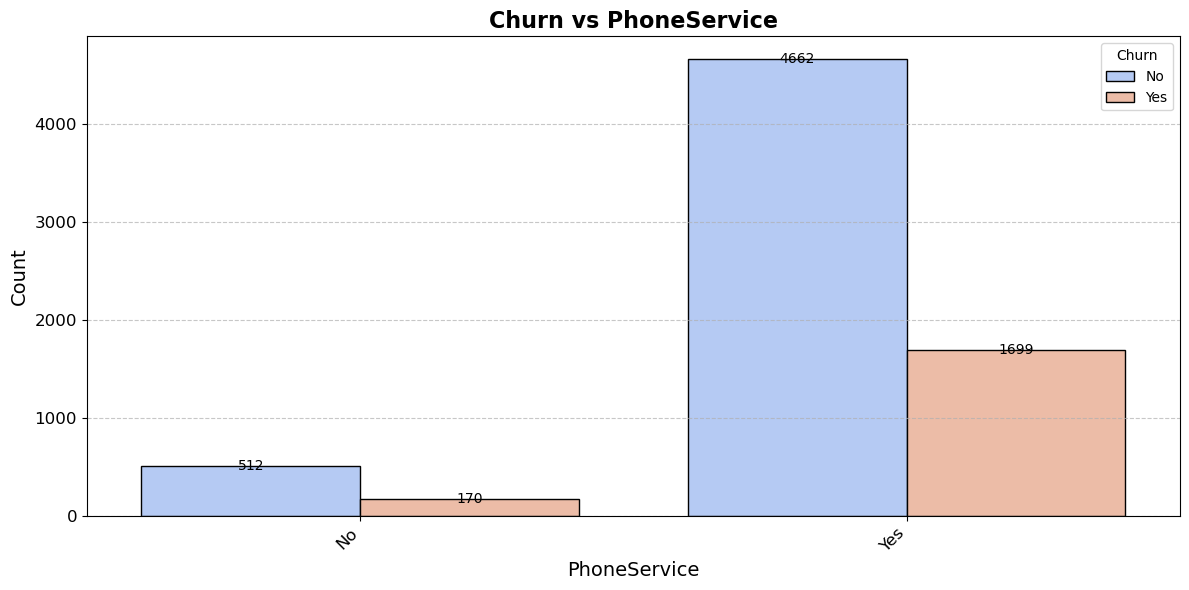

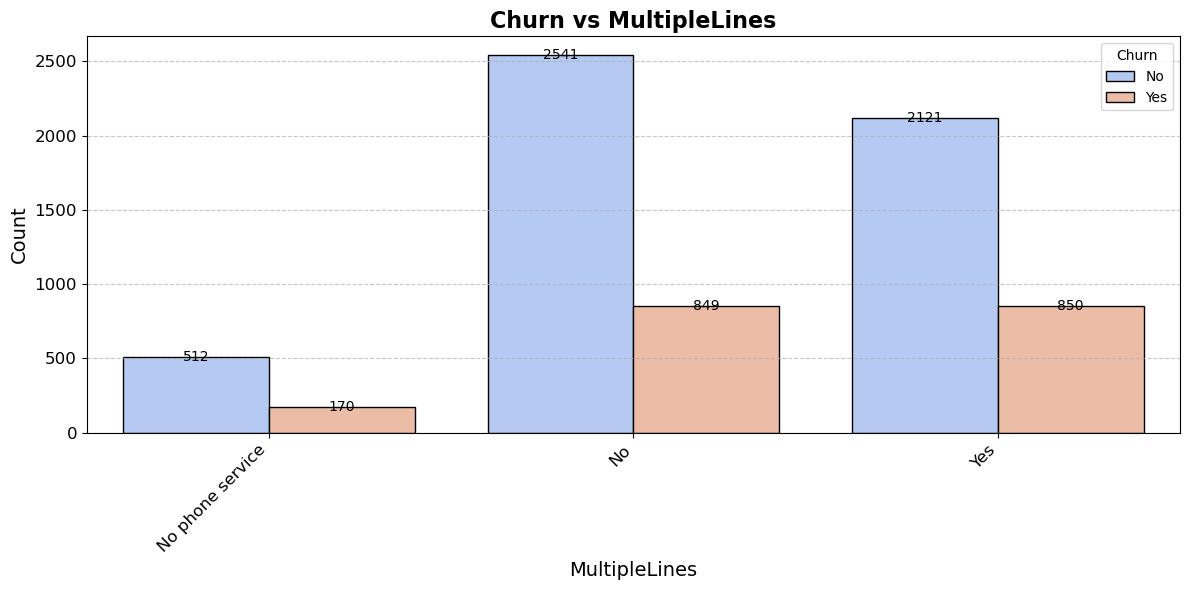

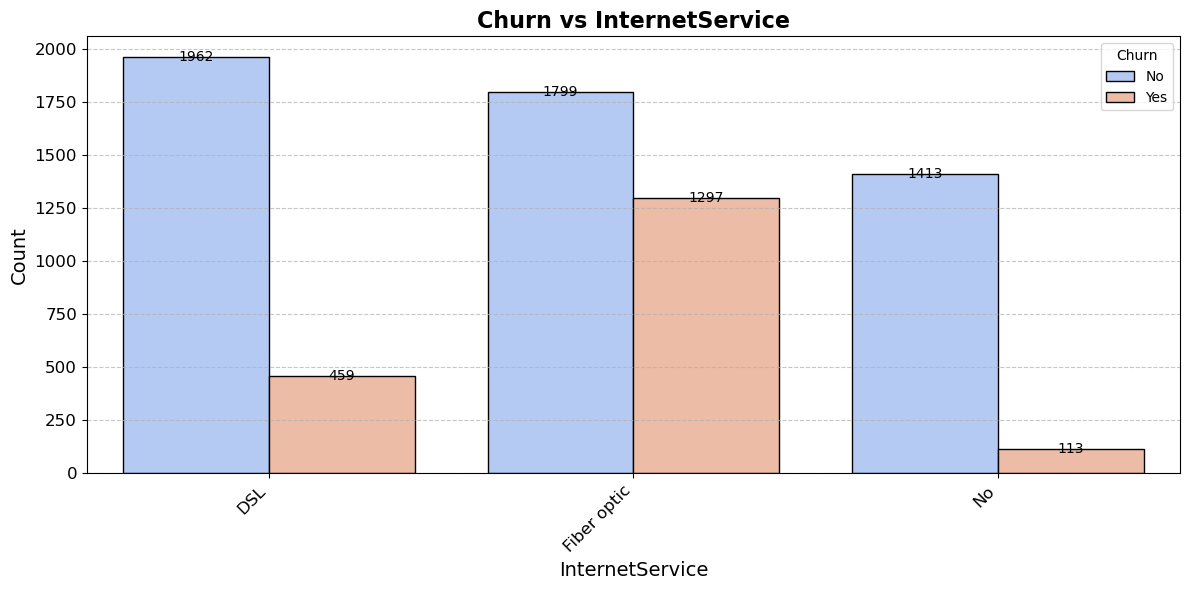

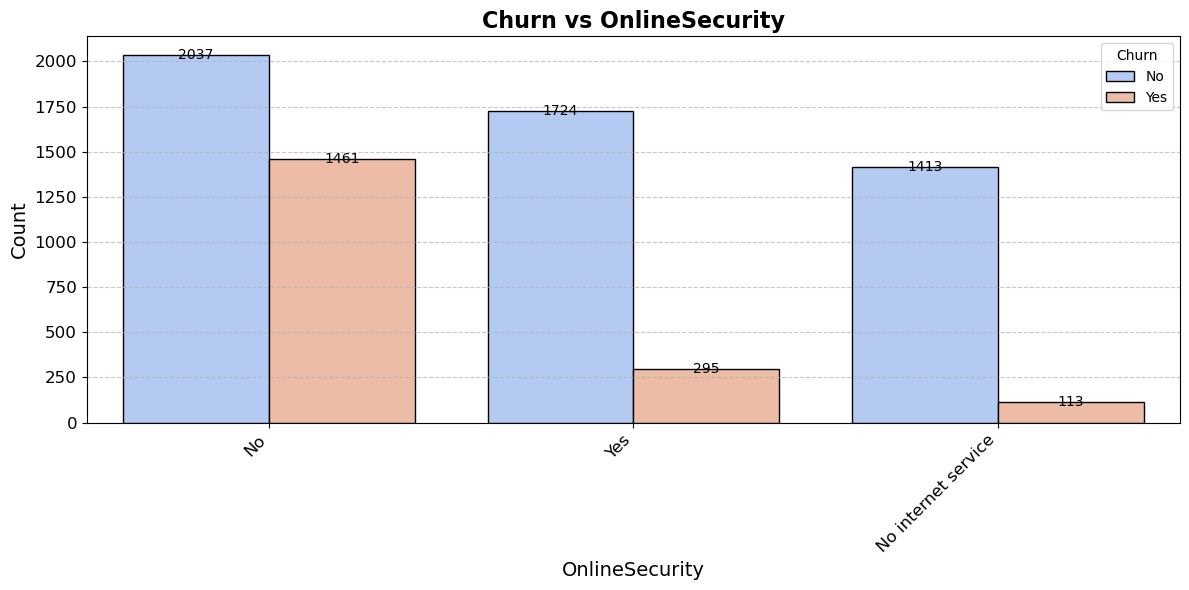

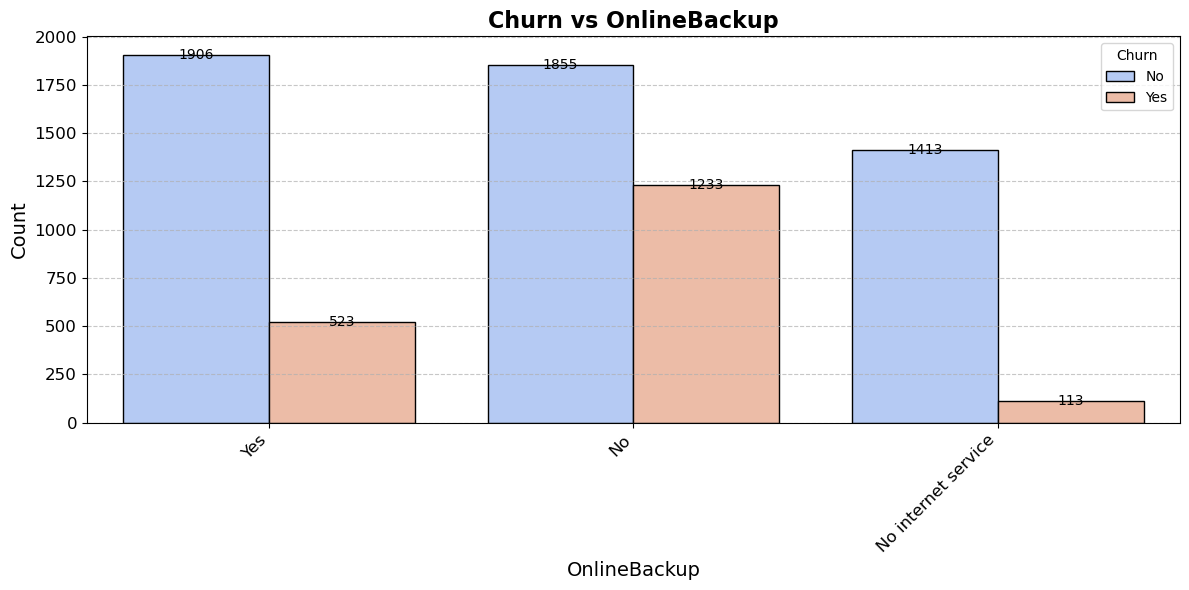

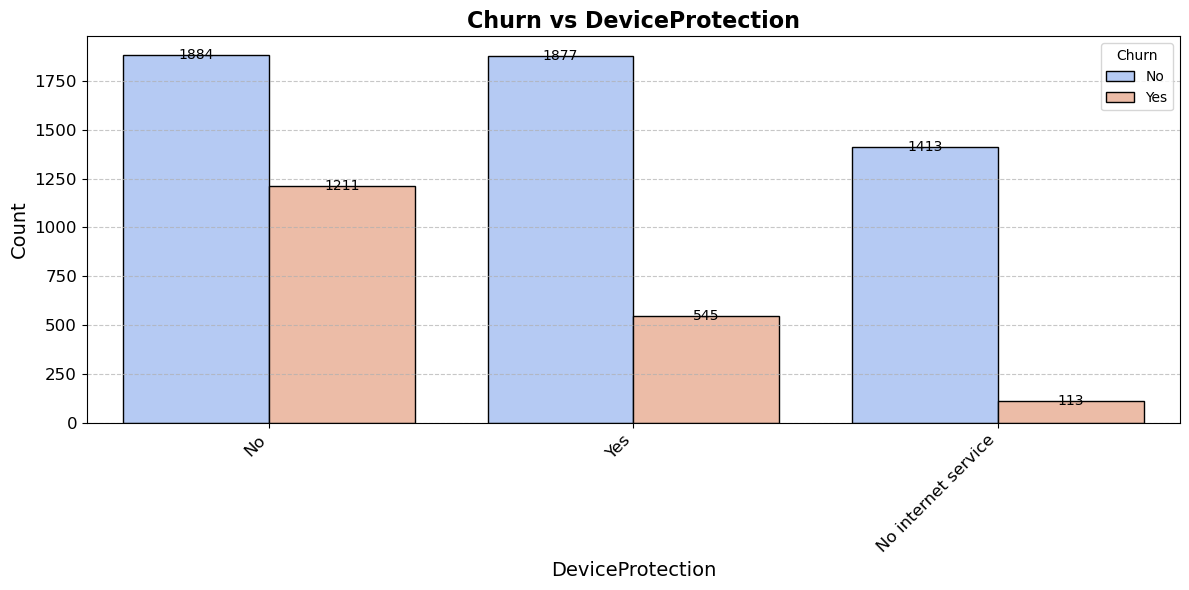

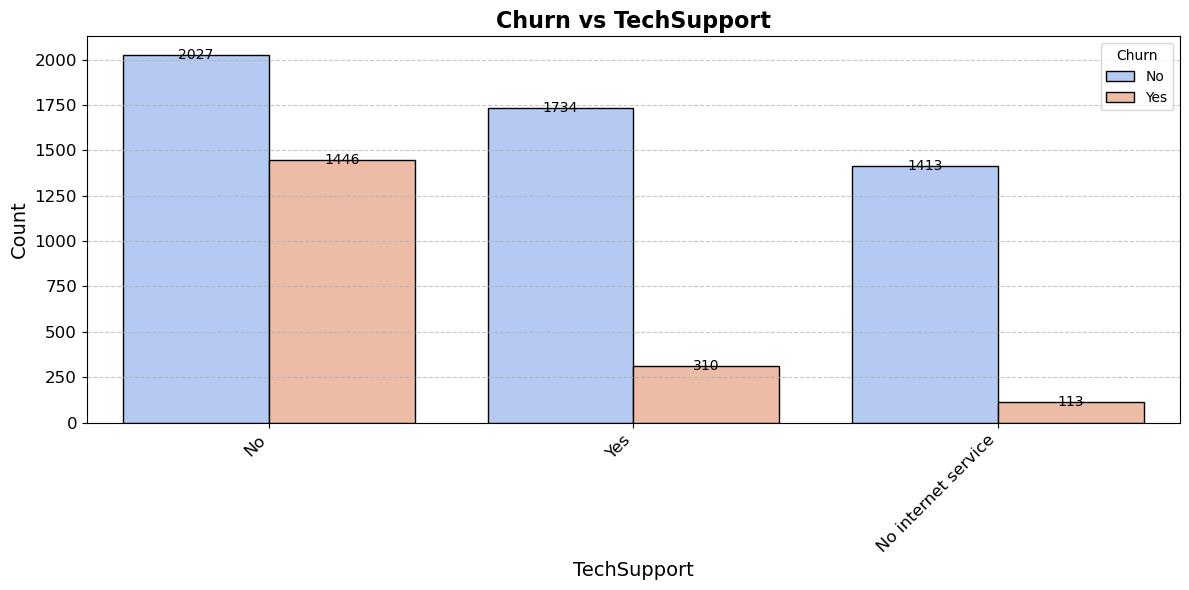

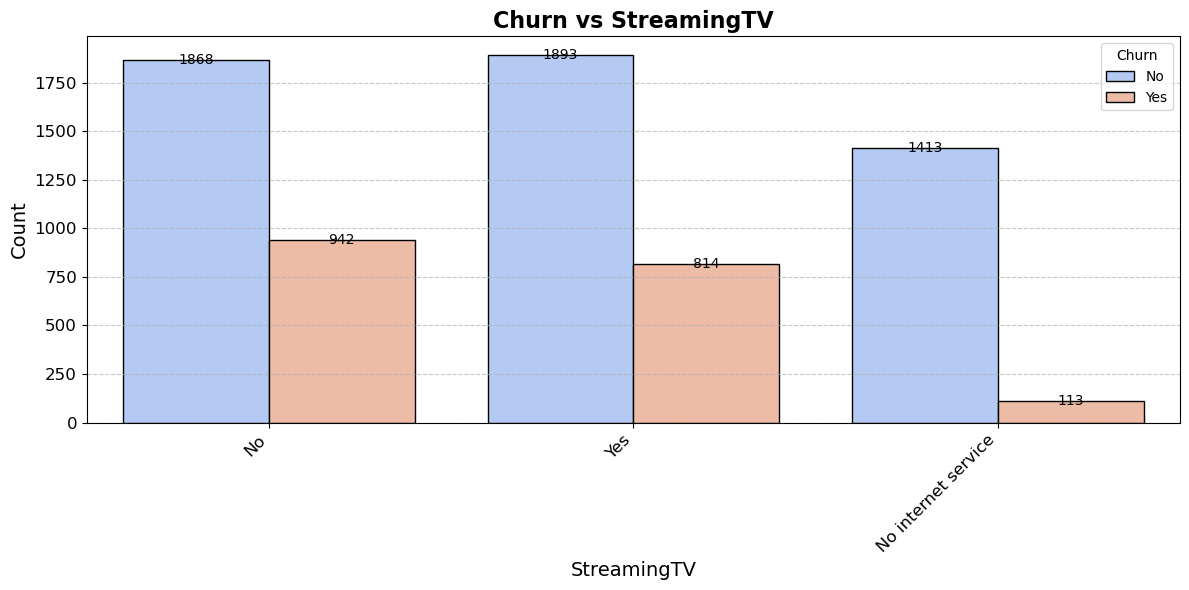

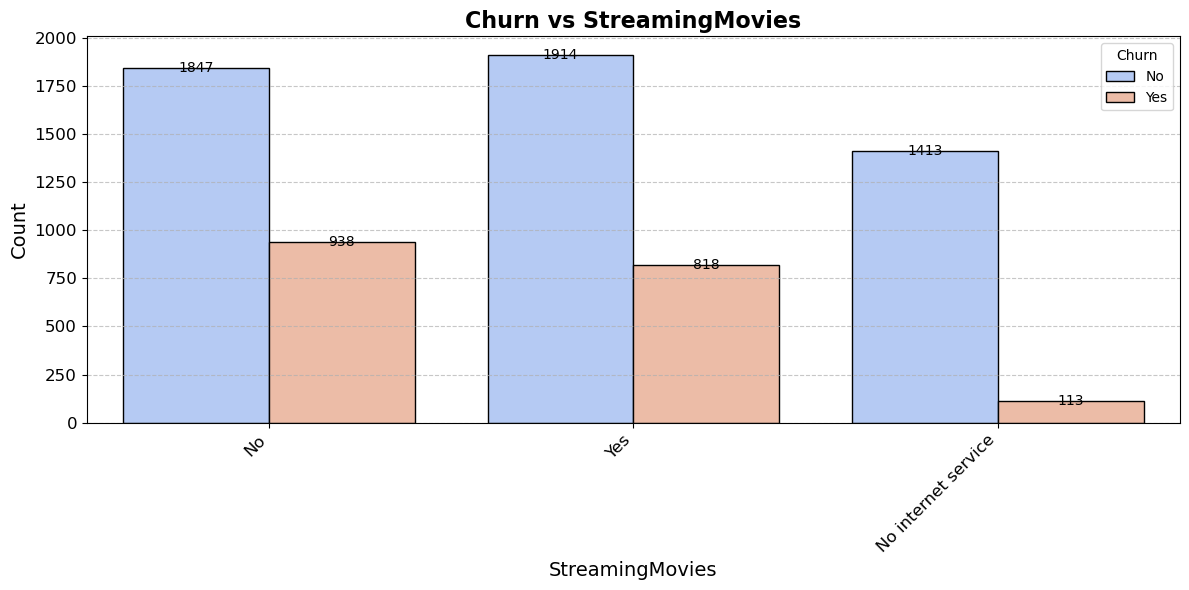

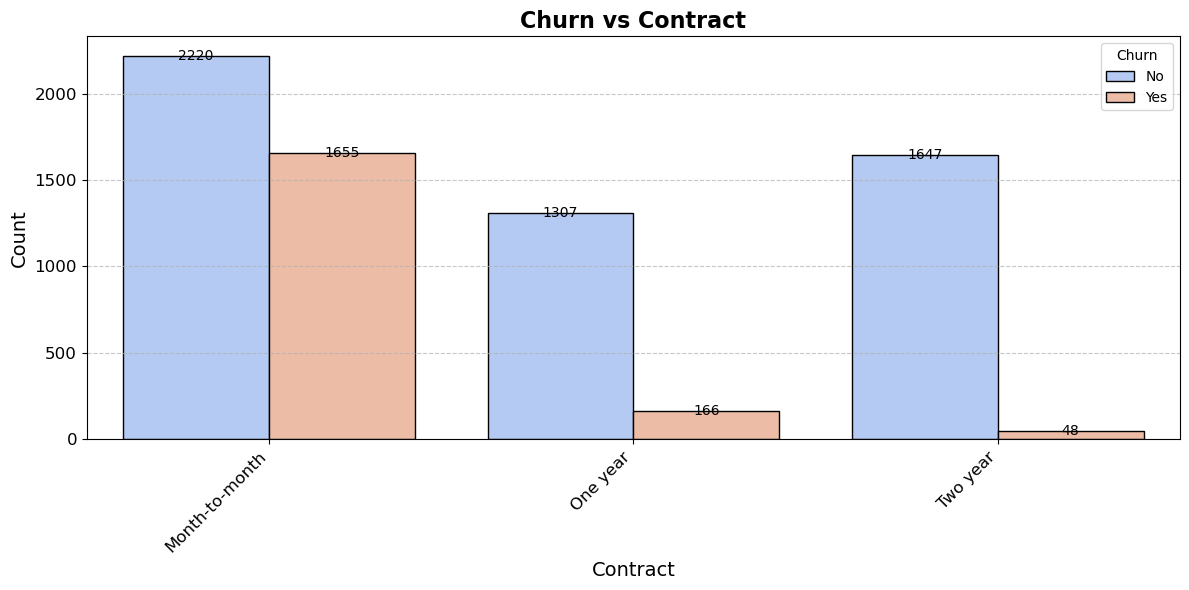

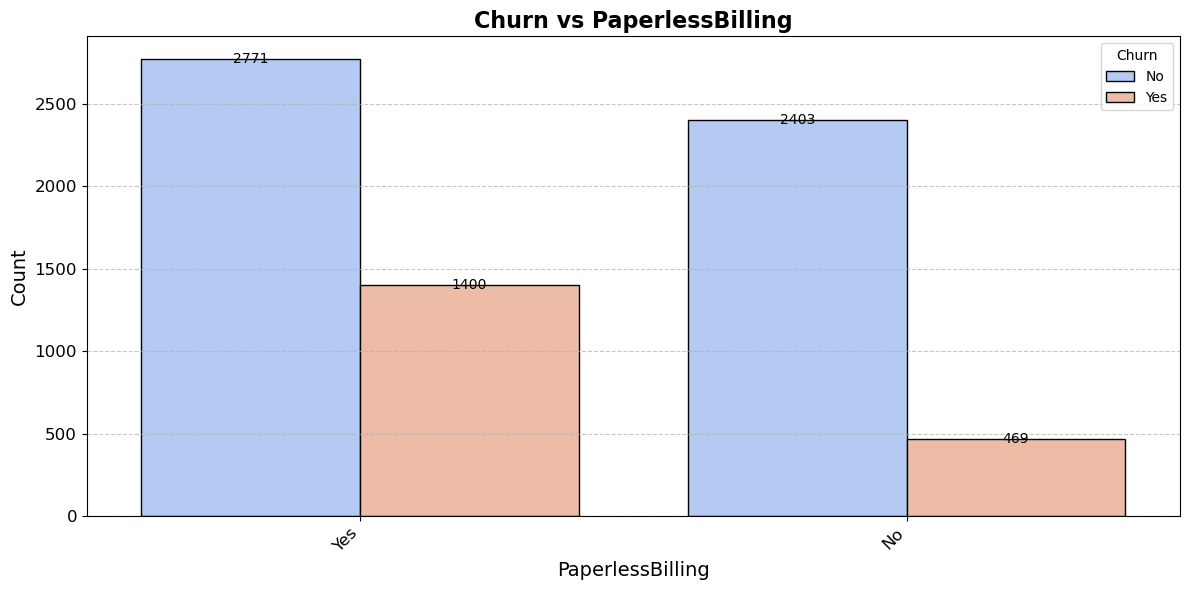

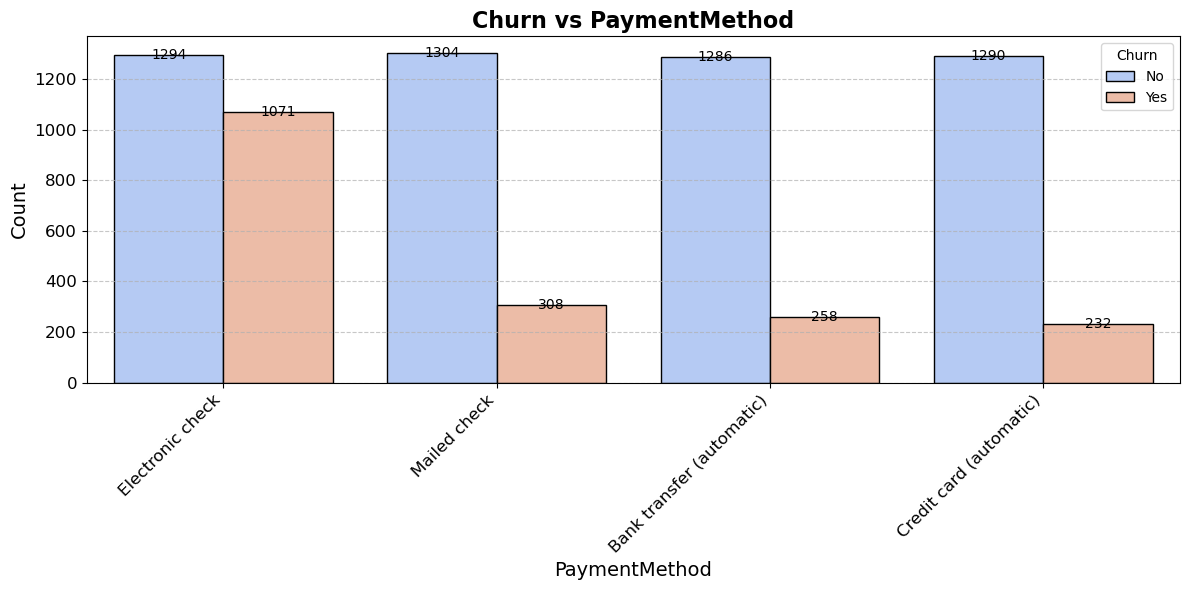

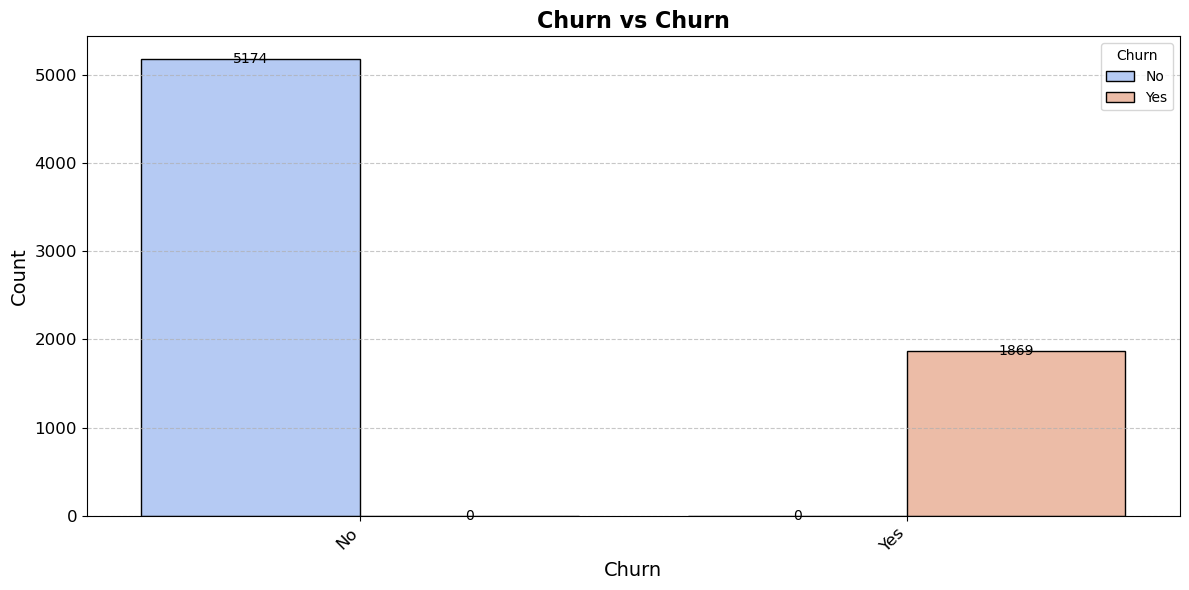

In [8]:
# Churn vs Categorical Features
for col in categorical_features:
    plt.figure(figsize=(12, 6))  # Increased figure size for better readability
    ax = sns.countplot(data=df, x=col, hue='Churn', palette='coolwarm', edgecolor='black')  # Added edgecolor
    plt.title(f'Churn vs {col}', fontsize=16, fontweight='bold')
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotated x-axis labels and adjusted fontsize
    plt.yticks(fontsize=12)  # Adjusted y-axis ticks fontsize
    
    # Add value labels on bars
    for p in ax.patches:
        width = p.get_width()
        plt.text(p.get_x() + width/2., p.get_height() + 0.1, int(p.get_height()), 
                 ha="center", va="center", fontsize=10)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Added grid for better readability
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


##### Churn vs Numerical Features (Boxplot)

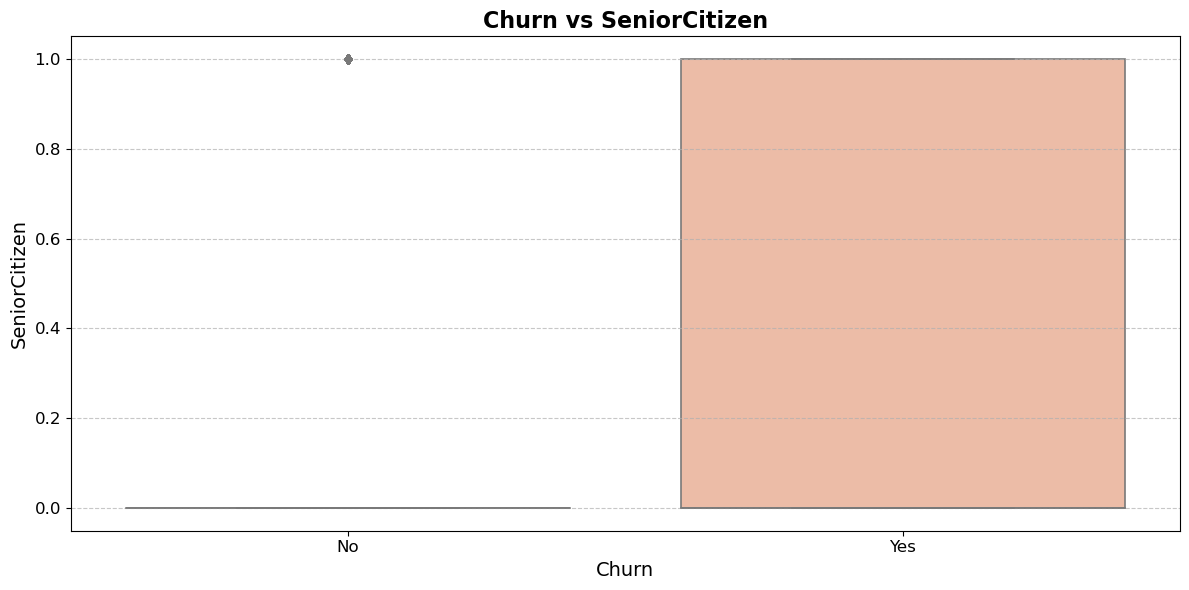

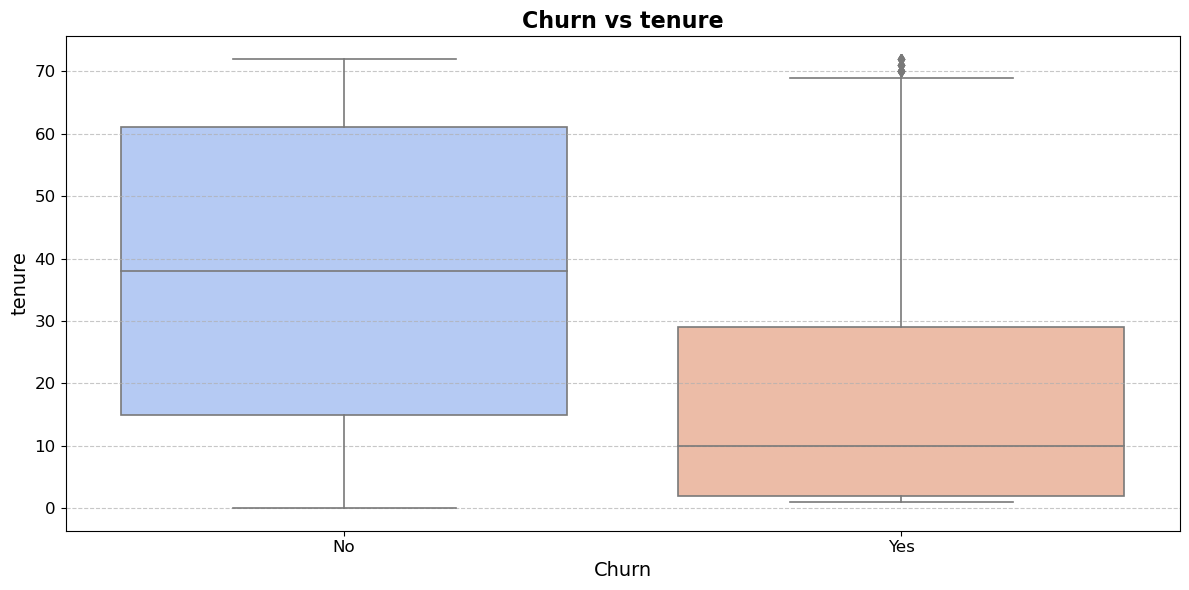

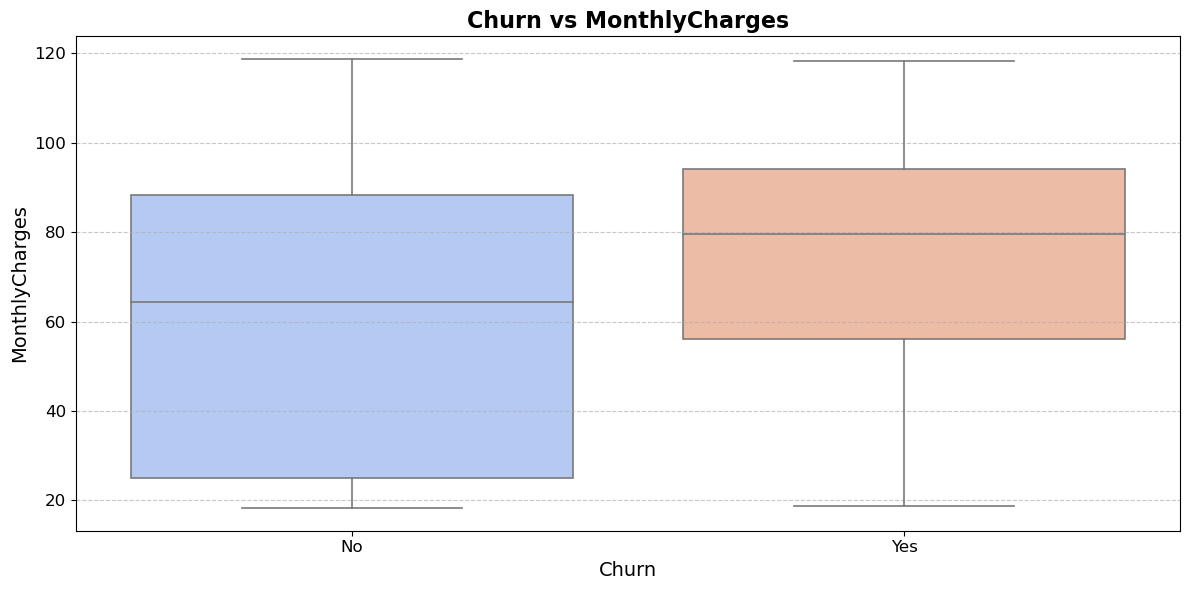

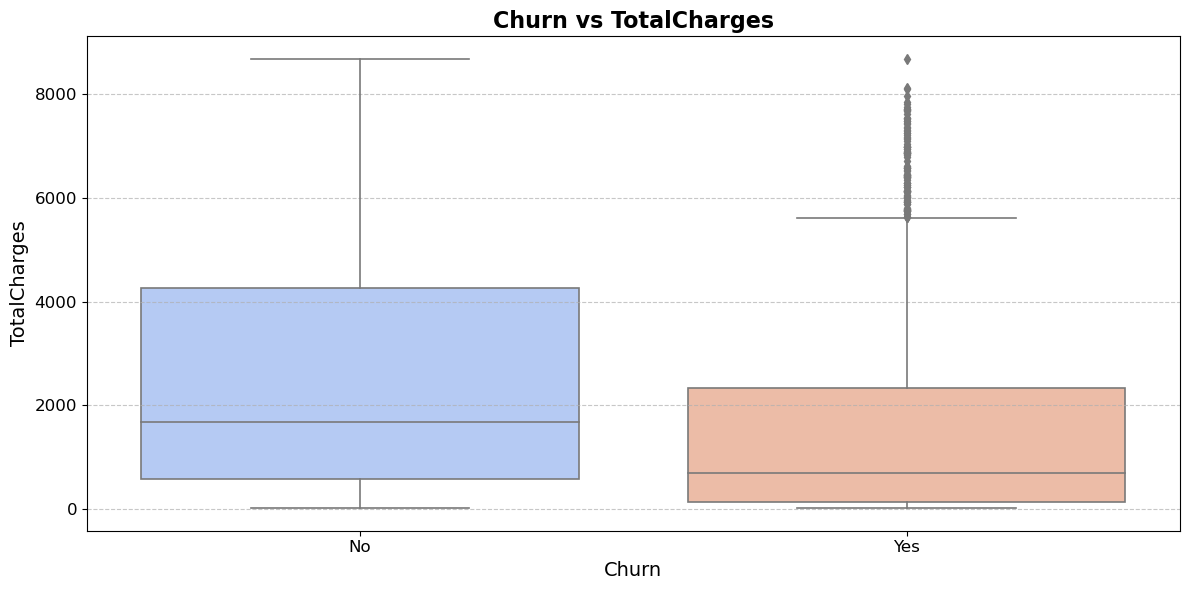

In [9]:
# Churn vs Numerical Features (Boxplot)
for col in numerical_features:
    plt.figure(figsize=(12, 6))  # Increased figure size for better readability
    ax = sns.boxplot(data=df, x='Churn', y=col, palette='coolwarm', linewidth=1.2)  # Adjusted linewidth for clarity
    plt.title(f'Churn vs {col}', fontsize=16, fontweight='bold')
    plt.xlabel('Churn', fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.xticks(fontsize=12)  # Adjusted x-axis ticks fontsize
    plt.yticks(fontsize=12)  # Adjusted y-axis ticks fontsize
    
    # Add gridlines
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add annotations for outliers (if any)
    for artist in ax.artists:
        artist.set_edgecolor('black')  # Set the edge color of the box plots

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


##### Correlation Analysis

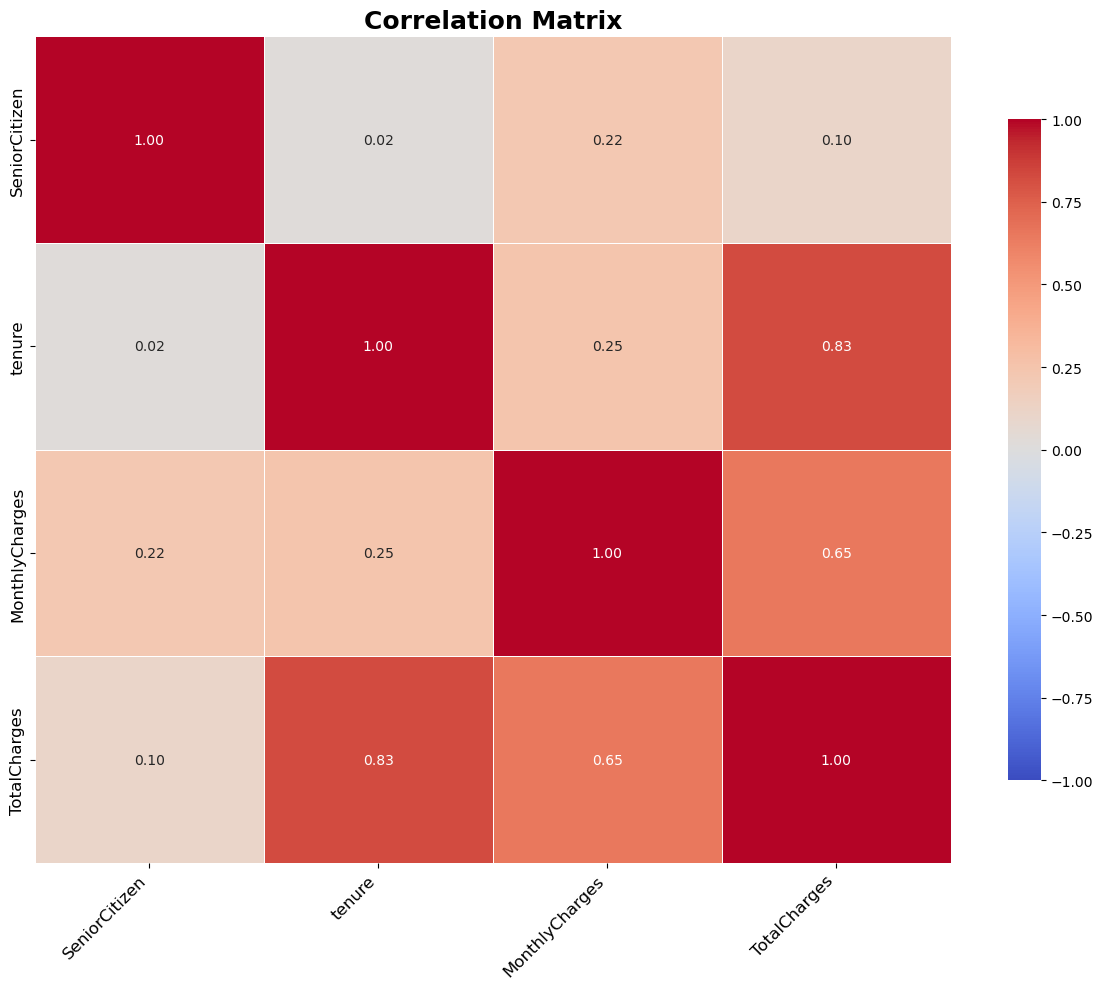

In [10]:
# Correlation matrix
plt.figure(figsize=(12, 10))  # Increased figure size for better readability
correlation_matrix = df.corr(numeric_only=True)

# Create the heatmap
ax = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
                 linewidths=0.5, vmin=-1, vmax=1, cbar_kws={"shrink": .8})

# Add titles and labels
plt.title("Correlation Matrix", fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotate x-ticks for better fit
plt.yticks(fontsize=12)  # Adjust y-ticks fontsize

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


##### Feature Engineering

In [11]:
# 6. Feature Engineering
# Encoding categorical variables using LabelEncoder for model preparation
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_features:
    df[col] = label_encoder.fit_transform(df[col])
# Check correlation with target variable (Churn)
correlation_with_churn = df.corr()['Churn'].sort_values(ascending=False)
print("\nCorrelation with Churn:\n", correlation_with_churn)



Correlation with Churn:
 Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.199484
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64


In [12]:
df.drop(['customerID', 'TotalCharges'],axis=1,inplace=True)
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


##### Data Preparation

In [13]:
X = df.drop("Churn", axis = 1)
y = df["Churn"]


In [14]:
X.shape


(7043, 18)

##### Data Preparation

1. Data preparation
2. Featuer Scaling

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


##### Model Evaluation

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


In [18]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}


In [19]:
model_accuracy = []

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracy.append({'Model': name, 'Accuracy': accuracy})

accuracy_df = pd.DataFrame(model_accuracy)


In [20]:
accuracy_df


,Model,Accuracy
0,Logistic Regression,0.819730
1,Decision Tree,0.713982
2,Random Forest,0.793471
3,Support Vector Machine,0.806955
4,K-Nearest Neighbors,0.756565
5,Naive Bayes,0.757984
6,Gradient Boosting,0.810504


LR ML Algorithm has the highest accuracy so Hypertunning can be used on it for improvement in performance

##### Hyperparameter Tuning with GridSearchCV

In [21]:
from sklearn.model_selection import GridSearchCV


In [22]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.logspace(-4, 4, 20),  # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers that support l1 and elasticnet
    'max_iter': [100, 200, 500]
}


In [23]:
logreg = LogisticRegression()


In [24]:
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1, scoring='accuracy')


In [25]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [26]:
best_params = grid_search.best_params_
best_params


{'C': 0.08858667904100823, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

In [27]:
best_score = grid_search.best_score_
best_score


0.7992548475100907

In [28]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)


In [29]:
test_accuracy


0.8197303051809794

-----------

## Step 5: Potential Risks in Production


- Identifying Risks
1. Data Drift: If customer behavior changes over time, the model may become less accurate. Regular retraining of the model will be necessary.

2. Concept Drift: If the factors that influence churn change over time, the model might need to be updated to reflect new patterns.

3. Training-Serving Skew: Differences between the training data and the live data used during deployment could lead to performance degradation. Ensure that the same preprocessing steps are applied in both training and production environments.

4. Latency: If the model is deployed in a real-time system, ensure that predictions can be made quickly enough to be actionable.

----------

In [ ]:
	Models	                    Accuracy
- **Logistic Regression**	    0.819730
- **Decision Tree**	          0.713982
- **Random Forest**	          0.793471
- **Support Vector Machine**	0.806955
- **K-Nearest Neighbors**	    0.756565
- **Naive Bayes**	            0.757984
- **Gradient Boosting**	      0.810504
